# Monte Carlo Integration

In [405]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy.integrate import quad

## Generating random numbers

For generating ths psudo random numbers, we are using the Linear Congunate algorithm. For a starting number called `seed`, this algorithm generates a sequence of random numbers which are corelated by this relation but are completely random in order:

$$r_{i+1} = rem\left( \frac{ar_i +c}{M} \right)$$

Where $M$, $a$ and $c$ are constants and function $rem$ means reminder of the division. 

In [120]:
a = 11
b = 0
M = 1e6

#wrting a function that generated random numbers between zero and one
def random(seed, N): #N is total random number we are generatin
    rand_list = []
    rand = seed
    for _ in range(N):
        rand = ((rand*a+b)%M)
        rand_list.append(rand/M)

    return rand_list

In [201]:
hist_list = random(10, 10000)

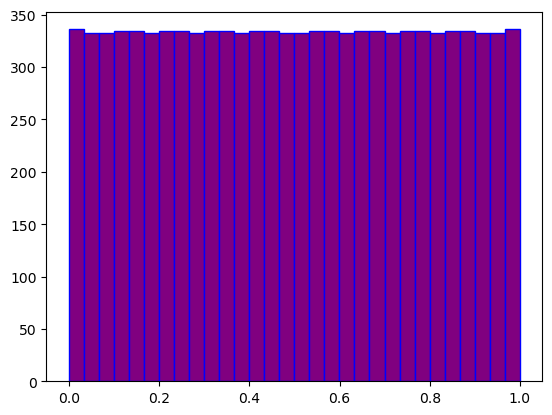

In [225]:
plt.hist(hist_list, bins=30, color='purple', edgecolor='b');

As we can see that the distribution of the random numbers is __uniform distribution__. 

To generate random integers between two numbers $a$ and $b$. I am dividing the range [0,1]  into $b-a$ intervales. And labelling them with integers. Then we generate the random number between $0$ and $1$ and see in which intervel this random number falls. That will be our random integer. 

In [254]:
#function to generate random integer between a to b

def randint(a, b, n):
    seed = 250
    l = []
    for i in range(n):
        rand = random(seed, 1)[0]
        seed = rand*M
        interval = 1/(b-a)
        num = a + rand//interval
        l.append(((num)))


    return (l)

In [ ]:
#function to generate random float between 0 to 6

def randint(a, b, n):
    seed = 250
    l = []
    for i in range(n):
        rand = random(seed, 1)[0]
        seed = rand*M
        num = a + rand * (b-a)
        l.append(((num)))


    return (l)

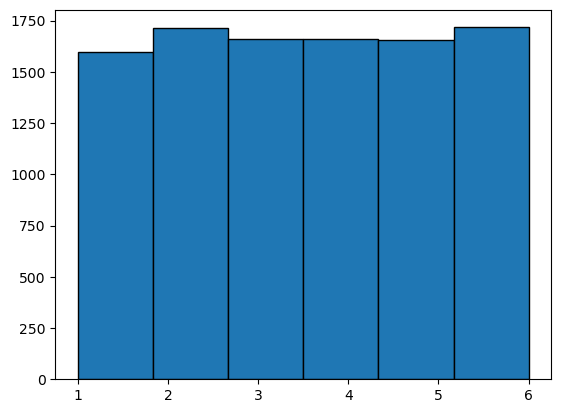

In [255]:
plt.hist(randint(1,7,10000), bins=6, edgecolor='black');

In [288]:
randint(1,7,10)

[1.0, 1.0, 2.0, 4.0, 2.0, 6.0, 5.0, 5.0, 6.0, 1.0]

This histogram in unifrom distribution.

## Central limit theoram

> Centeral limit theoram says that if $N$ random variables are taken from Indipandent Identical Distributions. Then the distribution of their sum tends to _normal distribution_ as $N \to \infty$

### Experiment 
A dice is thrown $100$ times and we note their sums. This sum will show approximately gaussian distribution.

In [133]:
seed = 4
another_hist_list = []
for i in range(1000):
    rand = random(seed, 1)
    seed = rand[-1]*M
    another_hist_list.append(rand)

In [284]:
steps = 1000
var = 100
sum_list = []
total = var*steps
randomlist = randint(1, 7, total)
for i in range(steps):
    sum_list.append(sum(randomlist[i*var:(i+1)*var]))



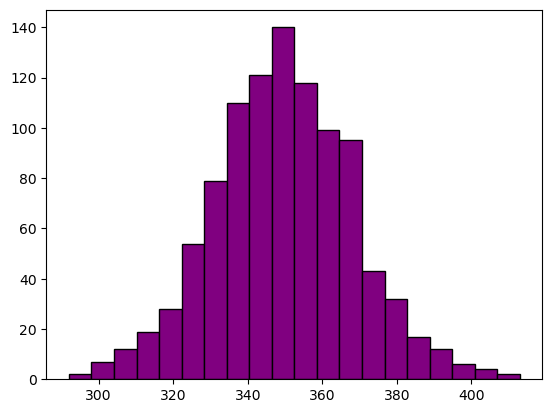

In [439]:
plt.hist(sum_list,bins=20, color='purple', edgecolor='black');

AS we can see that the distribution approximate the normal distribution.

## Pi from needles

#### The setup

We are droppoing needles from above on a square canvas. Which has three lines: A top line a bottom line and a line in the middle. If the needle cuts any of those lines, it is counted as one hit. The needle is described by two things, the location of it's center, and it's orientation which is its angle with the x axis. In our experiment both these things are chosen randomly. The distance between the line is $2$ units and the lenght of the needle is $1$ unit. 


If the distance from the closest line from the center is $x$ and the angle is $\theta$ then it will not cut the line for all the angles. It will only cut the line for angels which statisfy the equation: $0.5 \sin(\theta)<x$. Then we can take the probability of cutting the line which will be:

$$P(cutting) = \frac{\int_{0.5 \sin(\theta)<x}d\theta d x}{\int d\theta dx}$$ 

Where $0<d<1$ and $0<\theta<\pi$. This integration results the probabily of $1/\pi$. 

Now we shoot $N$ needles. If $N_a$ of them cuts the line then from probability of cutting would be $N_a/N$. we can compare the both and find 

$$\pi = \frac{N_a}{N}$$

We do this trial many times and find the values of $\pi$ and then we avarge them.


In [315]:
def pi_from_needles(N): #N is the number of needes
    a = 2
    count = 0
    for i in range(N):
        
        #randomly selecting the center of the needle
        x = np.random.uniform(0,4)
        y = np.random.uniform(0,4)
        theta = np.random.uniform(0, 2*np.pi) #randomly locating the orintiation

        if (a-y-0.5*np.sin(theta))*(a-y+0.5*np.sin(theta))<0: #it cuts the middle line
            count += 1
        elif (0-y-0.5*np.sin(theta))*(0-y+0.5*np.sin(theta))<0: #it cuts the top line 
            count += 1
        elif (4-y-0.5*np.sin(theta))*(4-y+0.5*np.sin(theta))<0: #it cuts the botton line
            count += 1
 
    return N/count



In [349]:
pi_from_needles(10000)

3.151591553734636

In [355]:
trails = 1000
pis = []
for i in tqdm(range(trails)):
    pis.append(pi_from_needles(10000))

100%|██████████| 1000/1000 [01:31<00:00, 10.97it/s]


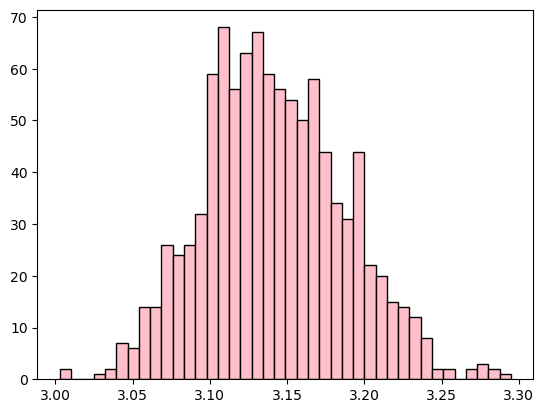

In [437]:
plt.hist(pis, bins=40, color='pink', edgecolor='black');

In [442]:
pi = sum(pis)/len(pis)

print("The value of pi is: ", pi)

The value of pi is:  3.141576109699093


As we can see that this value is pretty close to the real value of pi. 

## Monte Carlo Inetgration

Let's say we want to compute the integraion of function $f(x)$ over an interval $[a,b]$. Now we need to consider the expectation value of the function $f(x)$. Which is given by:

$$<f(x)> = \int_a^b f(x) p(x) dx $$

Where $p(x)$ is the probability desity function of $x$. In our case there is no probabilty density function. All the values that can be selected are equally probable. So the pdf will be unifrom. But to normalize it, we need to add a fector. $p(x) = 1/(b-a)$. Were $b-a$ is the total length of the intervel. Now the expectation value becomes:

$$<f(x)> = \frac{1}{b-a}\int_a^b f(x) dx $$

Now this expectation value can also be calculated by taking random data points, and avaraging over that. We can take enough points, the avarages would be the same. 

$$ <f(x)> = \frac{1}{N}\sum_{i=0}^N f(x_i) $$


Now by evaluating these two we can write as

$$ \int_a^b f(x) dx = \frac{b-a}{N} \sum_{i=0}^N f(x_i) $$


We will be evaluating this integration:

$$I = \int_0^1 \frac{x^3}{e^x-1} dx$$

In [417]:
def f(x):
    return x**3/(np.exp(x)-1)

In [452]:
def monte_carlo_step(a, b, N): #N is number of steps
    sum = 0
    for i in range(N):
        x = np.random.uniform(a,b)
        sum += f(x)

    A = ((b-a)/N)*sum
    return A

In [457]:
a = 0
b = 1
Is = []
for i in tqdm(range(1000)):
    Is.append(monte_carlo_step(a,b,10000))

100%|██████████| 1000/1000 [00:25<00:00, 39.46it/s]


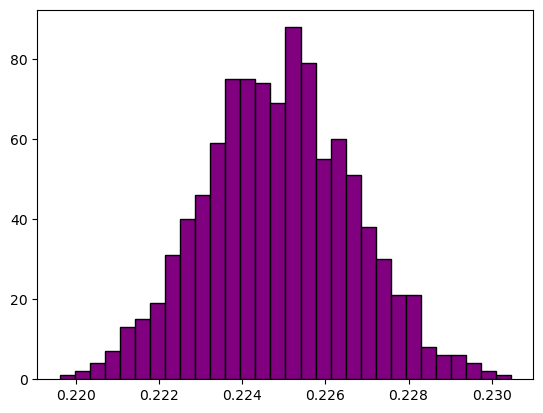

In [462]:
plt.hist(Is, bins=30, color='purple', edgecolor='black');

In [464]:
I = sum(Is)/len(Is)

In [465]:
Iq = quad(f,0,1)[0]

Text(0, 0.5, 'y')

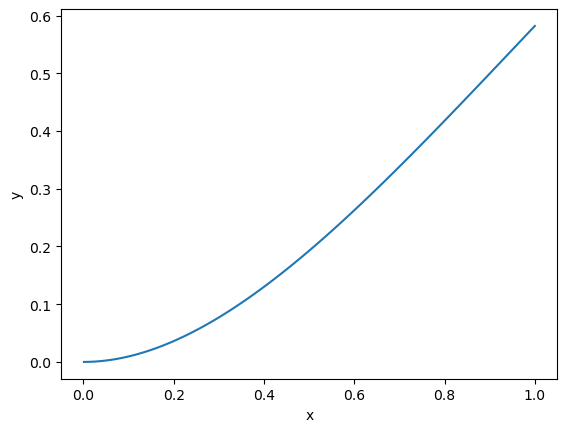

In [466]:
xxs = np.linspace(0.001, 1, 100)
yys = f(xxs)
plt.plot(xxs, yys)
plt.xlabel('x')
plt.ylabel('y')

In [470]:
print('Integral using monte carlo integration: ', I)
print('Integral using inbuilt integration fucntion: ', I)
print('difference: ' ,I-Iq)

Integral using monte carlo integration:  0.22488368492307592
Integral using inbuilt integration fucntion:  0.22488368492307592
difference:  7.849689713770869e-05


### Metropolis Hestings Algorithm

The Metropolis Histings is a Morkov Chain used to sample random variables given a probability destribution function. In direct sampling we take all the random variable to be equally probable.

Previously we show a sampling of random number in which the next iteration depended on the previous iteration. But that gave us a uniform distribution. But that is not aplicable in all situations. For example, in a random walk. The walker is mostly likely to step on the closer steps then the farther steps. That is some sampling bias. 

In this algorithm we have a distriubtion $p(x)$ which depends on $g(x)$. Now while sampling we follow this process.

- We start with some initial value $x_0$. 
- We iterate over and calculate the next value based on the previous value.
- we propose a move to some variable $x^*$ with some distribution $q(x^*)$ .
- Then we calculate the transistion probability 
$$\alpha = \frac{g(x^*) q(x^*|x_i)}{g(x_i) q(x_i|x^*)}$$
- if $\alpha>1$: accept the move and set $\theta_{i+1} = \theta^*$
- elif $\alpha<1$: accept the move and set $\theta_{i+1} = \theta^*$ with probability $\alpha$

If for some reason the proposal distribution $q(\theta)$ if uniform. Then the transistion probability would be:
$$\alpha = \frac{g(x^*)}{g(x_i)}$$

This is the Metropolis algorithm which we use to simulate the ising model. In ising model the probabily distribution will be:
$$p(E_r) \propto \exp{(-\beta E_r)} $$

Then the transition probability is just 

$$\alpha = \exp(-\beta \Delta E)$$